In [ ]:
import os
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# importing required modules
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/archive (8).zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from pathlib import Path
import cv2
import time
import random
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim

from torch.optim import lr_scheduler
import torchvision
from keras import utils
from torchvision import datasets, transforms
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import InceptionResNetV2

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("All Libraries Imported Successfully")

All Libraries Imported Successfully


In [ ]:
data_dir= '/content/Bone Break Classification/Bone Break Classification'

In [ ]:
train_data=utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.


In [ ]:
vald_data=utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)

Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [ ]:
for images,lables in train_data.take(1):
  print(images.shape)
  print(lables.shape)

(64, 256, 256, 3)
(64,)


In [ ]:
for images,lables in vald_data.take(1):
  print(images.shape)
  print(lables.shape)

(64, 256, 256, 3)
(64,)


In [ ]:
classes=train_data.class_names
print(classes)

['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [ ]:
def normalize(image, label):
  return image/255.0, label

train_data = train_data.map(normalize)

In [ ]:
vald_data= vald_data.map(normalize)

In [ ]:
train_x=[]
train_y=[]
for image,label in train_data:
   train_x.append(image)
   train_y.append(label)
   print(type(train_y))
train_x = tf.concat(train_x, axis=0)
train_y = tf.concat(train_y, axis=0)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
print(train_y)
type(train_y)

tf.Tensor([2 7 0 ... 8 4 2], shape=(1017,), dtype=int32)


tensorflow.python.framework.ops.EagerTensor

In [ ]:
train_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40
)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.


In [ ]:
class_names = train_data.class_names
print("Class names:", class_names)

Class names: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [ ]:
val_x=[]
val_y=[]
for image,label in train_data:
   val_x.append(image)
   val_y.append(label)
val_x = tf.concat(val_x, axis=0)
val_y = tf.concat(val_y, axis=0)

In [ ]:
num_classes = 10
train_y = tf.keras.utils.to_categorical(train_y, num_classes=num_classes)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(60, (3, 3), activation='relu', input_shape=(256, 256, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(120, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 60)        │           1,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 60)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 120)       │          64,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 120)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 461280)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 40)                  │      18,451,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,518,250 (70.64 MB)

 Trainable params: 18,518,250 (70.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, batch_size=10, epochs=10)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.1312 - loss: 2.9321
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.1902 - loss: 2.2590
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.3708 - loss: 1.9658
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.6162 - loss: 1.2538
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.8388 - loss: 0.6406
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.9315 - loss: 0.3226
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.9704 - loss: 0.1670
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.9718 - loss: 0.1568
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.9826 - loss: 0.1578
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9953 - loss: 0.0521


In [ ]:
train_loss, train_accuracy = model.evaluate(train_x,train_y, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(val_x,val_y, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.41%
Test Accuracy: 99.41%


In [ ]:
CLASSES = np.array(class_names)

preds = model.predict(val_x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step


In [ ]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(val_y, axis=-1)]

In [ ]:
def display_preds_act(n=10, figsize=(15, 3)):
    indices = np.random.choice(range(len(val_x)), n)  # Sample from images, not labels

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)

    for i, idx in enumerate(indices):
        img = val_x[idx]  # Retrieve the image data
        ax = fig.add_subplot(1, n, i + 1)
        ax.axis("off")
        ax.text(0.5, -0.35, "pred = " + str(preds_single[idx].split(" ")[0][:4]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.text(0.5, -0.7, "act = " + str(actual_single[idx].split(" ")[0][:4]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.imshow(img)  # Display the image

    plt.show()


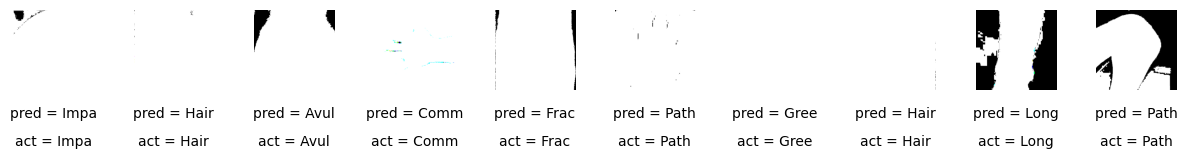

In [ ]:
display_preds_act(n=10)

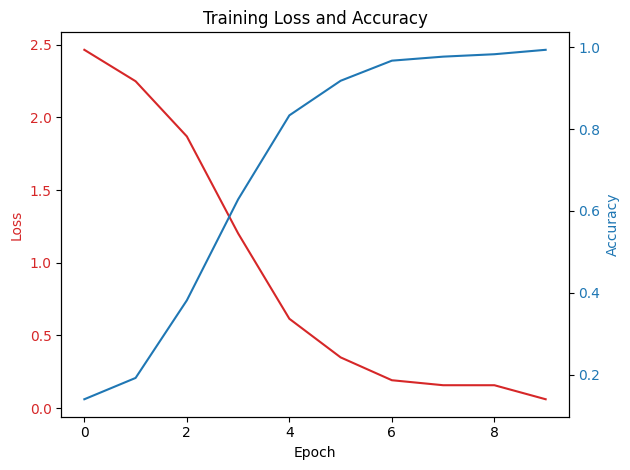

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(history.history['loss'], color='tab:red', label='Train Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(history.history['accuracy'], color='tab:blue', label='Train Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Training Loss and Accuracy')
fig.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(val_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(val_y, axis=1)

class_names = [
    'Avulsion fracture',
    'Comminuted fracture',
    'Fracture Dislocation',
    'Greenstick fracture',
    'Hairline Fracture',
    'Impacted fracture',
    'Longitudinal fracture',
    'Oblique fracture',
    'Pathological fracture',
    'Spiral Fracture'
]

report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step
                       precision    recall  f1-score   support

    Avulsion fracture       1.00      0.99      1.00       109
  Comminuted fracture       1.00      0.99      1.00       127
 Fracture Dislocation       1.00      1.00      1.00       146
  Greenstick fracture       0.99      1.00      1.00       112
    Hairline Fracture       1.00      1.00      1.00       102
    Impacted fracture       0.99      0.97      0.98        76
Longitudinal fracture       1.00      0.99      0.99        76
     Oblique fracture       0.99      1.00      0.99        75
Pathological fracture       1.00      1.00      1.00       115
      Spiral Fracture       0.96      0.99      0.97        79

             accuracy                           0.99      1017
            macro avg       0.99      0.99      0.99      1017
         weighted avg       0.99      0.99      0.99      1017



In [ ]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate per-class metrics
precision1 = precision_score(y_true_classes, y_pred_classes, average=None)
recall1 = recall_score(y_true_classes, y_pred_classes, average=None)
f11 = f1_score(y_true_classes, y_pred_classes, average=None)
mcc1 = matthews_corrcoef(y_true_classes, y_pred_classes)
kappa = cohen_kappa_score(y_true_classes, y_pred_classes)

# For specificity, we need to compute it manually
specificity1 = []
for i in range(conf_matrix.shape[0]):
    # True Negatives: sum all elements except the ith row and ith column
    tn = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    # False Positives: sum the ith column except the diagonal
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    # False Negatives: sum the ith row except the diagonal
    fn = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
    # True Positives: diagonal element
    tp = conf_matrix[i, i]
    specificity1.append(tn / (tn + fp))
print(f"Precision per class: {precision1}")
print(f"Recall per class: {recall1}")
print(f"F1 Score per class: {f11}")
print(f"Specificity per class: {specificity1}")
print(f"Cohen's Kappa Score: {kappa}")
print(f"Matthews Correlation Coefficient (MCC): {mcc1}")



Precision per class: [1.         1.         1.         0.99115044 1.         0.98666667
 1.         0.98684211 1.         0.96296296]
Recall per class: [0.99082569 0.99212598 1.         1.         1.         0.97368421
 0.98684211 1.         1.         0.98734177]
F1 Score per class: [0.99539171 0.99604743 1.         0.99555556 1.         0.98013245
 0.99337748 0.99337748 1.         0.975     ]
Specificity per class: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9988950276243094), np.float64(1.0), np.float64(0.9989373007438895), np.float64(1.0), np.float64(0.9989384288747346), np.float64(1.0), np.float64(0.9968017057569296)]
Cohen's Kappa Score: 0.9934062015420109
Matthews Correlation Coefficient (MCC): 0.9934115697637312


In [ ]:
print(conf_matrix)

[[108   0   0   0   0   0   0   1   0   0]
 [  0 126   0   0   0   0   0   0   0   1]
 [  0   0 146   0   0   0   0   0   0   0]
 [  0   0   0 112   0   0   0   0   0   0]
 [  0   0   0   0 102   0   0   0   0   0]
 [  0   0   0   1   0  74   0   0   0   1]
 [  0   0   0   0   0   0  75   0   0   1]
 [  0   0   0   0   0   0   0  75   0   0]
 [  0   0   0   0   0   0   0   0 115   0]
 [  0   0   0   0   0   1   0   0   0  78]]


In [ ]:
class_names_dict = {
    0: 'Avulsion fracture',
    1: 'Comminuted fracture',
    2: 'Fracture Dislocation',
    3: 'Greenstick fracture',
    4: 'Hairline Fracture',
    5: 'Impacted fracture',
    6: 'Longitudinal fracture',
    7: 'Oblique fracture',
    8: 'Pathological fracture',
    9: 'Spiral Fracture'
}

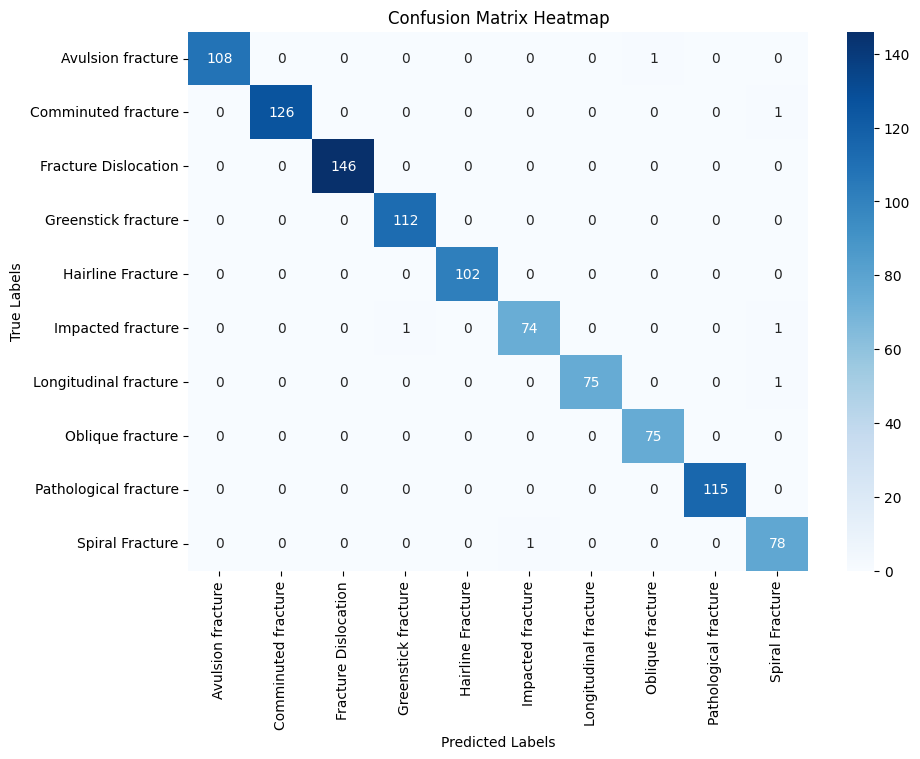

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(class_names_dict.values()),
            yticklabels=list(class_names_dict.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
model.save("BONE NET V2.h5")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("/content/BONE NET V2.h5")
print(model.input_shape)
print(model.summary())
# Define class labels (Ensure this matches the original class order)
class_names = [
    "Avulsion fracture", "Comminuted fracture", "Fracture Dislocation",
    "Greenstick fracture", "Hairline Fracture", "Impacted fracture",
    "Longitudinal fracture", "Oblique fracture", "Pathological fracture",
    "Spiral Fracture"
]

# Function to predict a new image
def predict_image(image_path):
    img_size = (256, 256)  # Change to match model input size
    img = image.load_img(image_path, target_size=img_size)  # Resize correctly
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)

    return class_names[class_index], confidence

# Provide an image path (Change this to your test image path)
test_image_path = "/content/Bone Break Classification/Bone Break Classification/Oblique fracture/Test/1000_F_264769365_u927dRxrrx1fi4rlR1VWif9LcGeJwv4h_jpg.rf.b2d149cb90da63cbc49ec73e82bf0935.jpg"  # Update with actual image path
predicted_label, confidence = predict_image(test_image_path)

print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.4f}")


(None, 256, 256, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 60)        │           1,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 60)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 120)       │          64,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 120)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 461280)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 40)                  │      18,451,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,518,252 (70.64 MB)

 Trainable params: 18,518,250 (70.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Predicted Class: Oblique fracture, Confidence: 1.0000
